In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sys
import os
sys.path.append(os.path.abspath('..'))
from src.PCA import PCA, PCA_Projected_data, Test_PCA

In [8]:
df = pd.read_json("../Data/data_frame.json", orient='records', lines=True)
D = np.stack(df['image_vector'].values)
y = df['label'].values 

X_train = D[: : 2]
X_test = D[1: : 2]

y_train = y[: : 2]
y_test = y[1: : 2]

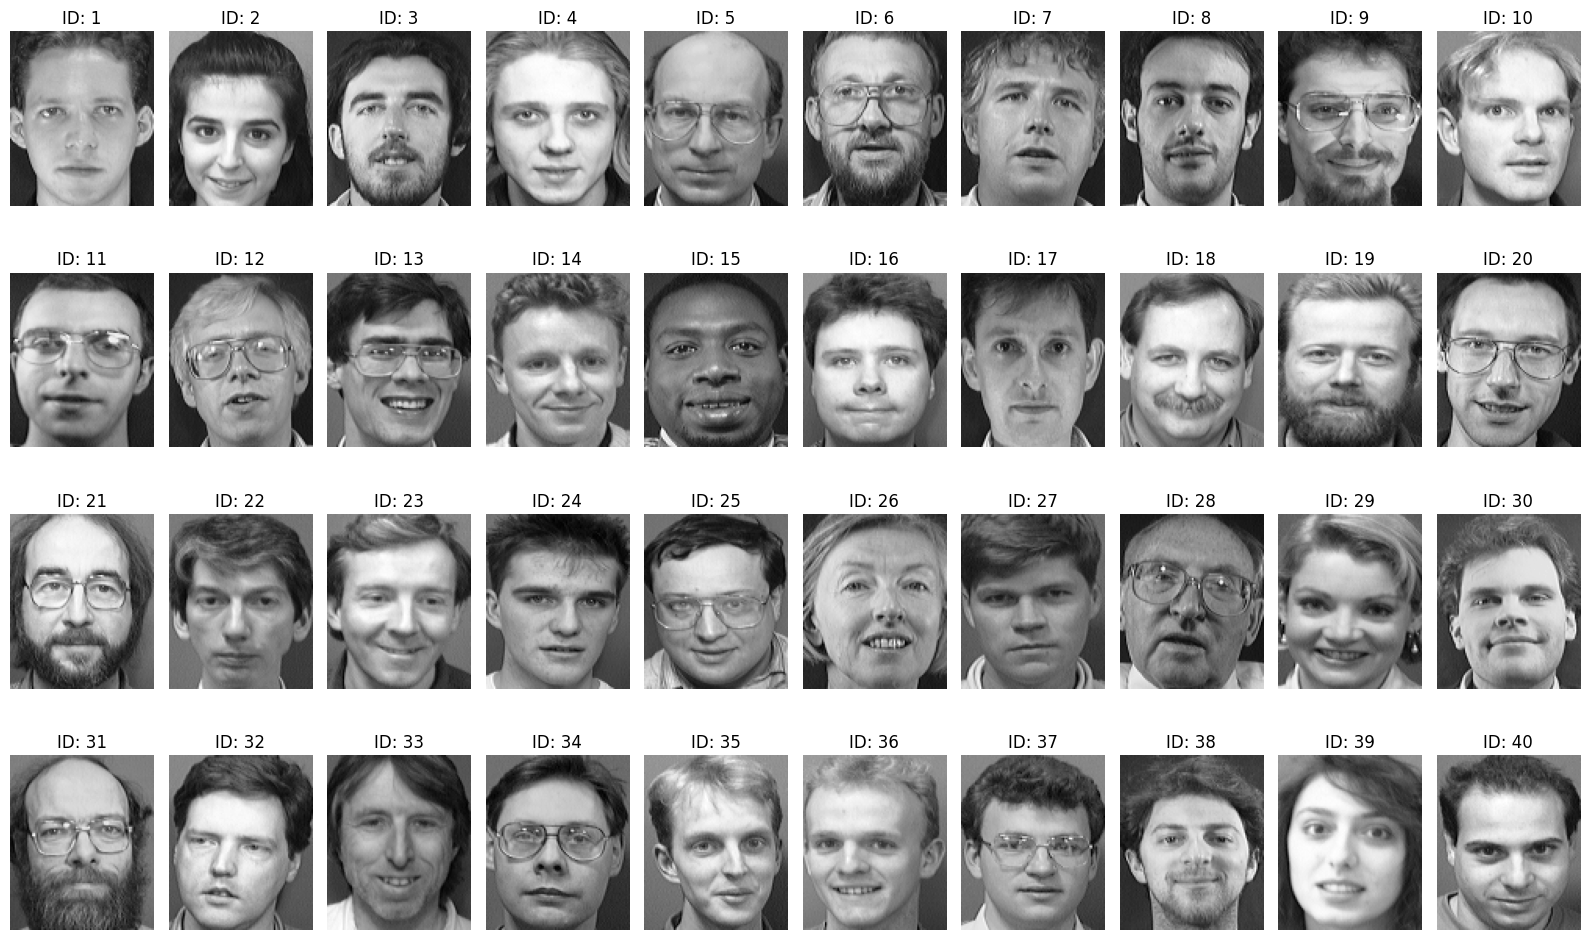

In [9]:
image_height = 112
image_width = 92

fig, axs = plt.subplots(4, 10, figsize=(16, 10))
axs = axs.ravel()

for i in range(40):
    image_vector = df.iloc[i * 10]["image_vector"]  
    image_array = np.reshape(image_vector, (image_height, image_width))
    
    axs[i].imshow(image_array, cmap="gray")
    axs[i].set_title(f"ID: {i + 1}")
    axs[i].axis("off")

plt.tight_layout()
plt.show()

In [10]:
mean_face, eigenfaces = PCA(X_train, 0.8)
eigenfaces.shape

(10304, 36)

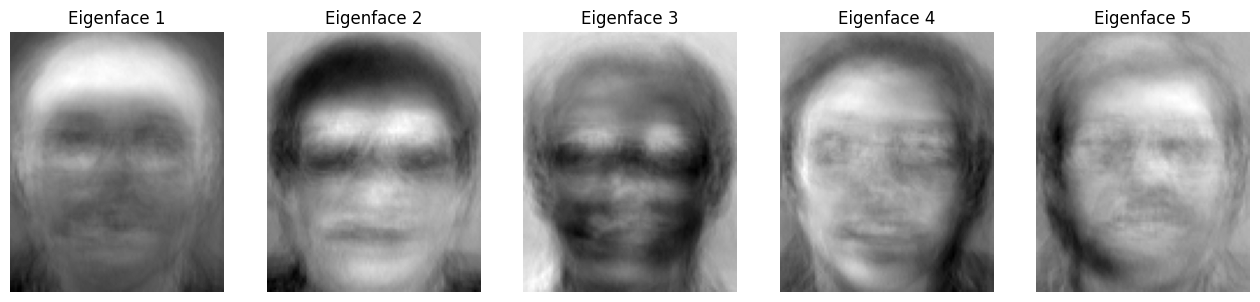

In [11]:
# plotting first 5 eigenfaces
_, eigenfaces = PCA(X_train, 0.95)

image_height = 112
image_width = 92
fig, axs = plt.subplots(1, 5, figsize=(16, 10))
for i in range(5):
    image_array = np.reshape(eigenfaces[:, i], (image_height, image_width))
    axs[i].imshow(image_array, cmap="gray")
    axs[i].set_title("Eigenface " + str(i + 1))
    axs[i].axis("off")

In [12]:
print("PCA Accuracy: " + str(Test_PCA(X_train,X_test,y_train,y_test,0.85, 1)))

PCA Accuracy: 0.94


In [ ]:
alphas = [0.8, 0.85, 0.9, 0.95]
k_values = [1, 3, 5, 7, 9]
df = pd.DataFrame(index=alphas, columns=k_values)
for num_dominant_eigen_vectors in alphas:
    for k in k_values:
        accuracy = Test_PCA(X_train,X_test,y_train,y_test,num_dominant_eigen_vectors, k)
        df.loc[num_dominant_eigen_vectors, k] = accuracy

df

,1,3,5,7,9
0.80,0.94,0.905,0.895,0.88,0.835
0.85,0.94,0.9,0.895,0.855,0.83
0.90,0.94,0.905,0.89,0.855,0.815
0.95,0.93,0.9,0.865,0.83,0.805


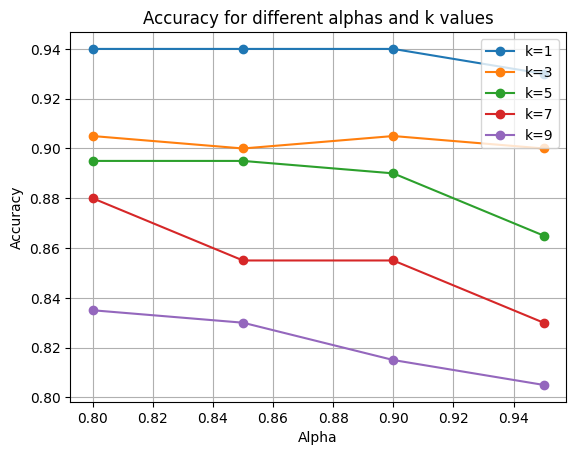

In [14]:
for k in k_values:
    plt.plot(df.index, df[k], marker="o", label=f"k={k}")

plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy for different alphas and k values")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()